# DBSCAN: Density-Based Spatial Clustering of Applications with Noise

## Agenda
**Introduction to Clustering**

**Visualizations & Results/ Analysis & Comparison/ Performance summary**

    1. DBSCAN, k-Means, Hierarchical on Dataset A: 'make_moons'

    2. DBSCAN, k-Means, Hierarchical on Dataset B: 'make_blobs'

**Performance summary**



**Conclusion**
Failure scenarios

Strengths/weaknesses and trade-offs

## Introduction
DBSCAN groups data points based on density rather than distance from a center (like k-means). It defines clusters as areas of high point density separated by areas of low density.

*Key Parameters*: 
*Epsilon (ε)*: Defines the neighborhood radius around a point.
The most important parameter to choose appropriately is for the data set and the distance function. 

The max distance between 2 samples for one is considered as core point

*min_samples*: The minimum number of points required to form a dense region and core point (including the point itself). DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be sparser.


In [2]:
from sklearn.cluster import DBSCAN

In [ ]:
?DBSCAN

## Visualizations & Results/ Analysis & Comparison/ Performance summary
(Using sklearn Datasets)
make_moons(n_samples=300, noise=0.05)

make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5])

### Dataset where DBSCAN excels (e.g., non-spherical clusters, datasets with noise)
using make_moons data set from sklearn.datasets

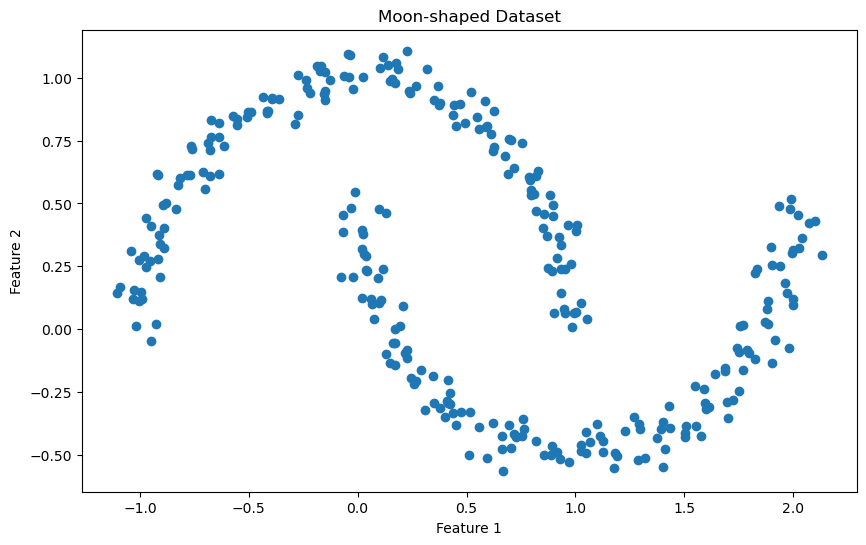

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

#load data
moon = make_moons(n_samples=300, noise=0.05, random_state=42)
x, y = moon

# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1])
plt.title('Moon-shaped Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


NameError: name 'summarize' is not defined